In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Applying styles to notebook

plt.style.use('fivethirtyeight')

In [3]:
# import the dataset from specified location

df=pd.read_csv('/content/indian_liver_patient.csv')

# showing the data from top 5

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# New Section

In [4]:
# finding the datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
# finding the null values

df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [6]:
#finding the sum of null values in the data

df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
# Handling and filling the missing value


df=df.fillna(0)
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [8]:
#Encoding(manual encoding)

df['Gender']=df['Gender'].replace({'Female':0,'Male':1})
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
"""
Types of Analysis
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis
4. Descriptive Analysis
"""

# Descriptive Analysis
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.940566,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.327962,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.000000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.920000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<Axes: xlabel='Albumin', ylabel='Density'>

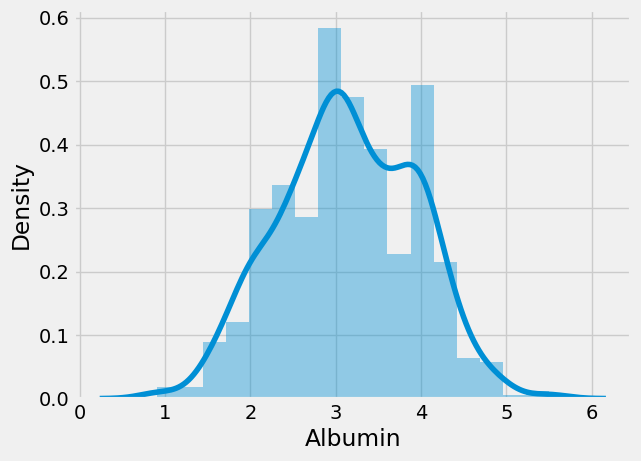

In [10]:

# Univariate analysis -Extracting info from a single column

#checking data distribution

sns.distplot(df['Albumin'])

In [11]:
#Splitting Dep & Indep variable

x=df.drop('Dataset',axis=1)
x.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [12]:
y=df['Dataset']
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

<Axes: xlabel='Gender', ylabel='Dataset'>

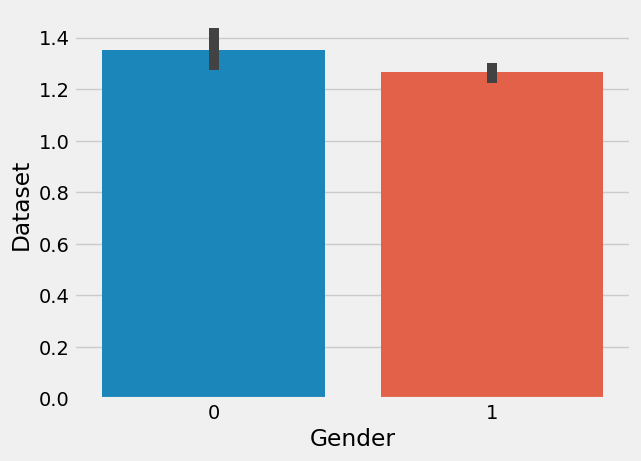

In [13]:
# Bivariate
sns.barplot(x='Gender',y='Dataset',data=df)

<Axes: >

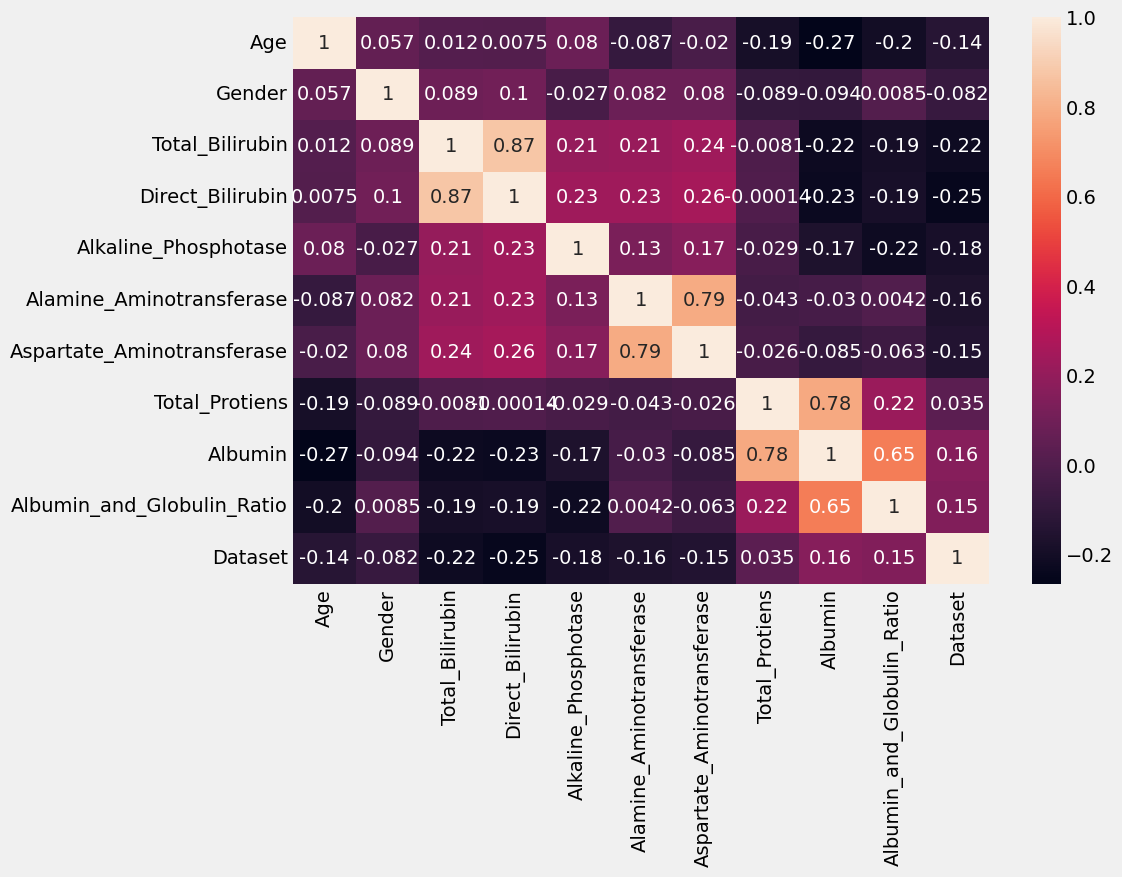

In [14]:
#Multivariate

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [15]:
# Data preprocessing

# Finding the shape of the data

df.shape

(583, 11)

Text(0.5, 1.0, 'Aspartate_Aminotransferase')

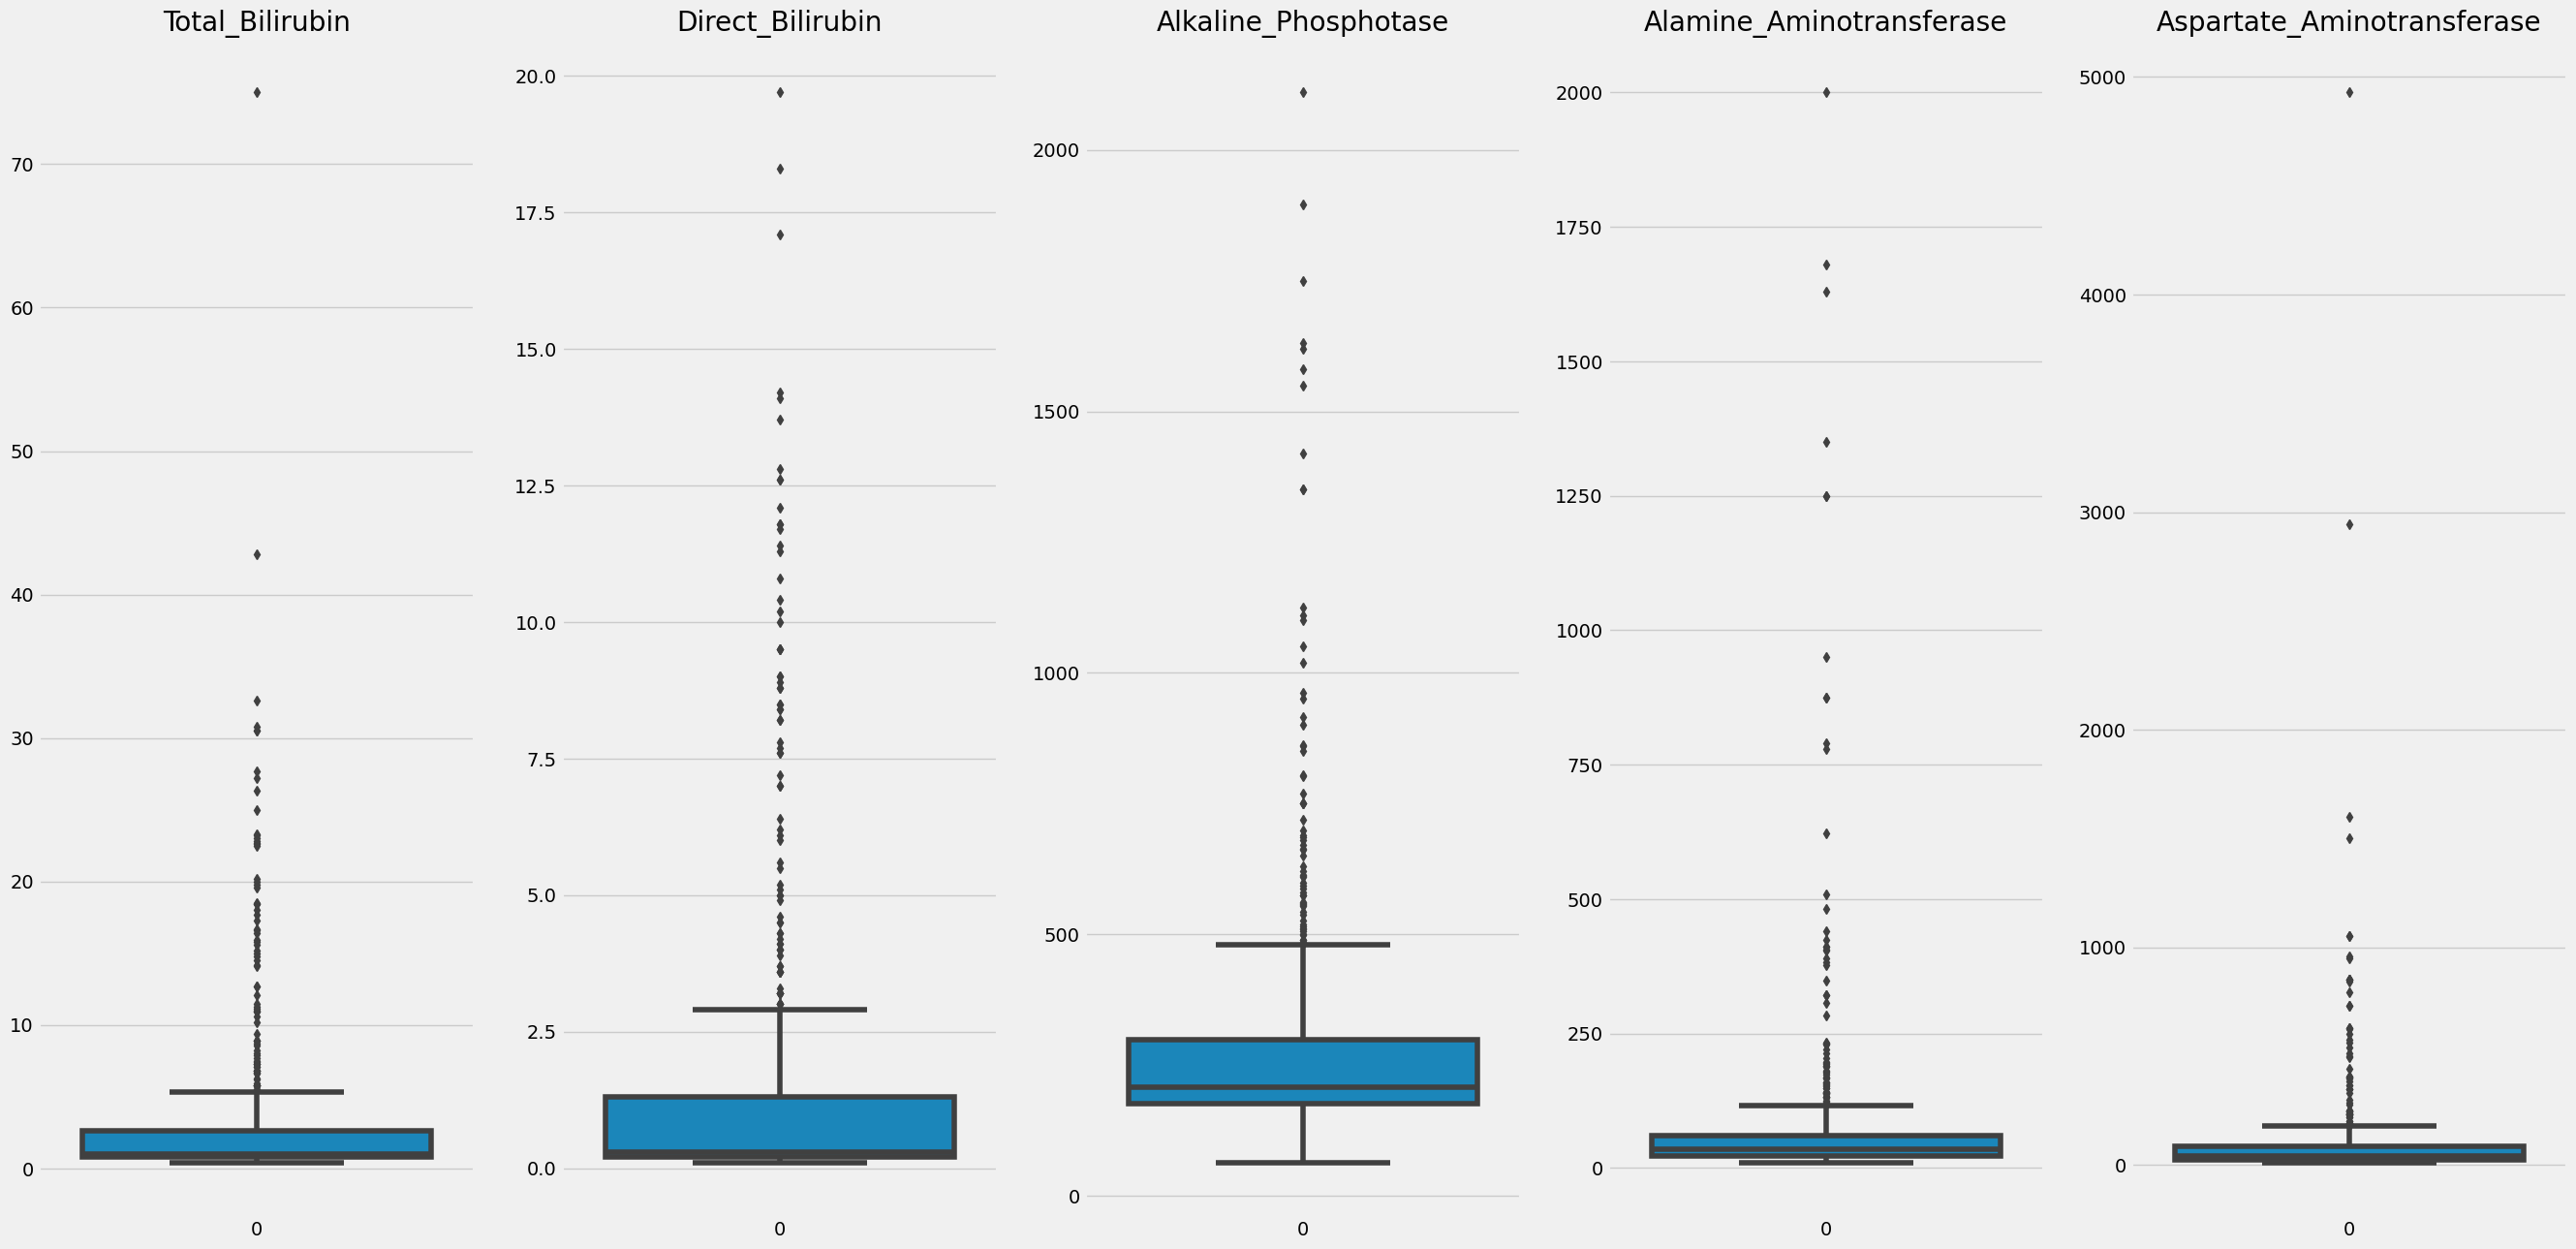

In [16]:
# Finding outliers using boxplot for Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase and Aspartate_Aminotransferase
plt.figure(figsize=(30,15))
plt.subplot(151)
sns.boxplot(df['Total_Bilirubin'])
plt.title('Total_Bilirubin')
plt.subplot(152)
sns.boxplot(df['Direct_Bilirubin'])
plt.title('Direct_Bilirubin')
plt.subplot(153)
sns.boxplot(df['Alkaline_Phosphotase'])
plt.title('Alkaline_Phosphotase')
plt.subplot(154)
sns.boxplot(df['Alamine_Aminotransferase'])
plt.title('Alamine_Aminotransferase')
plt.subplot(155)
sns.boxplot(df['Aspartate_Aminotransferase'])
plt.title('Aspartate_Aminotransferase')

Text(0.5, 1.0, 'Albumin_and_Globulin_Ratio')

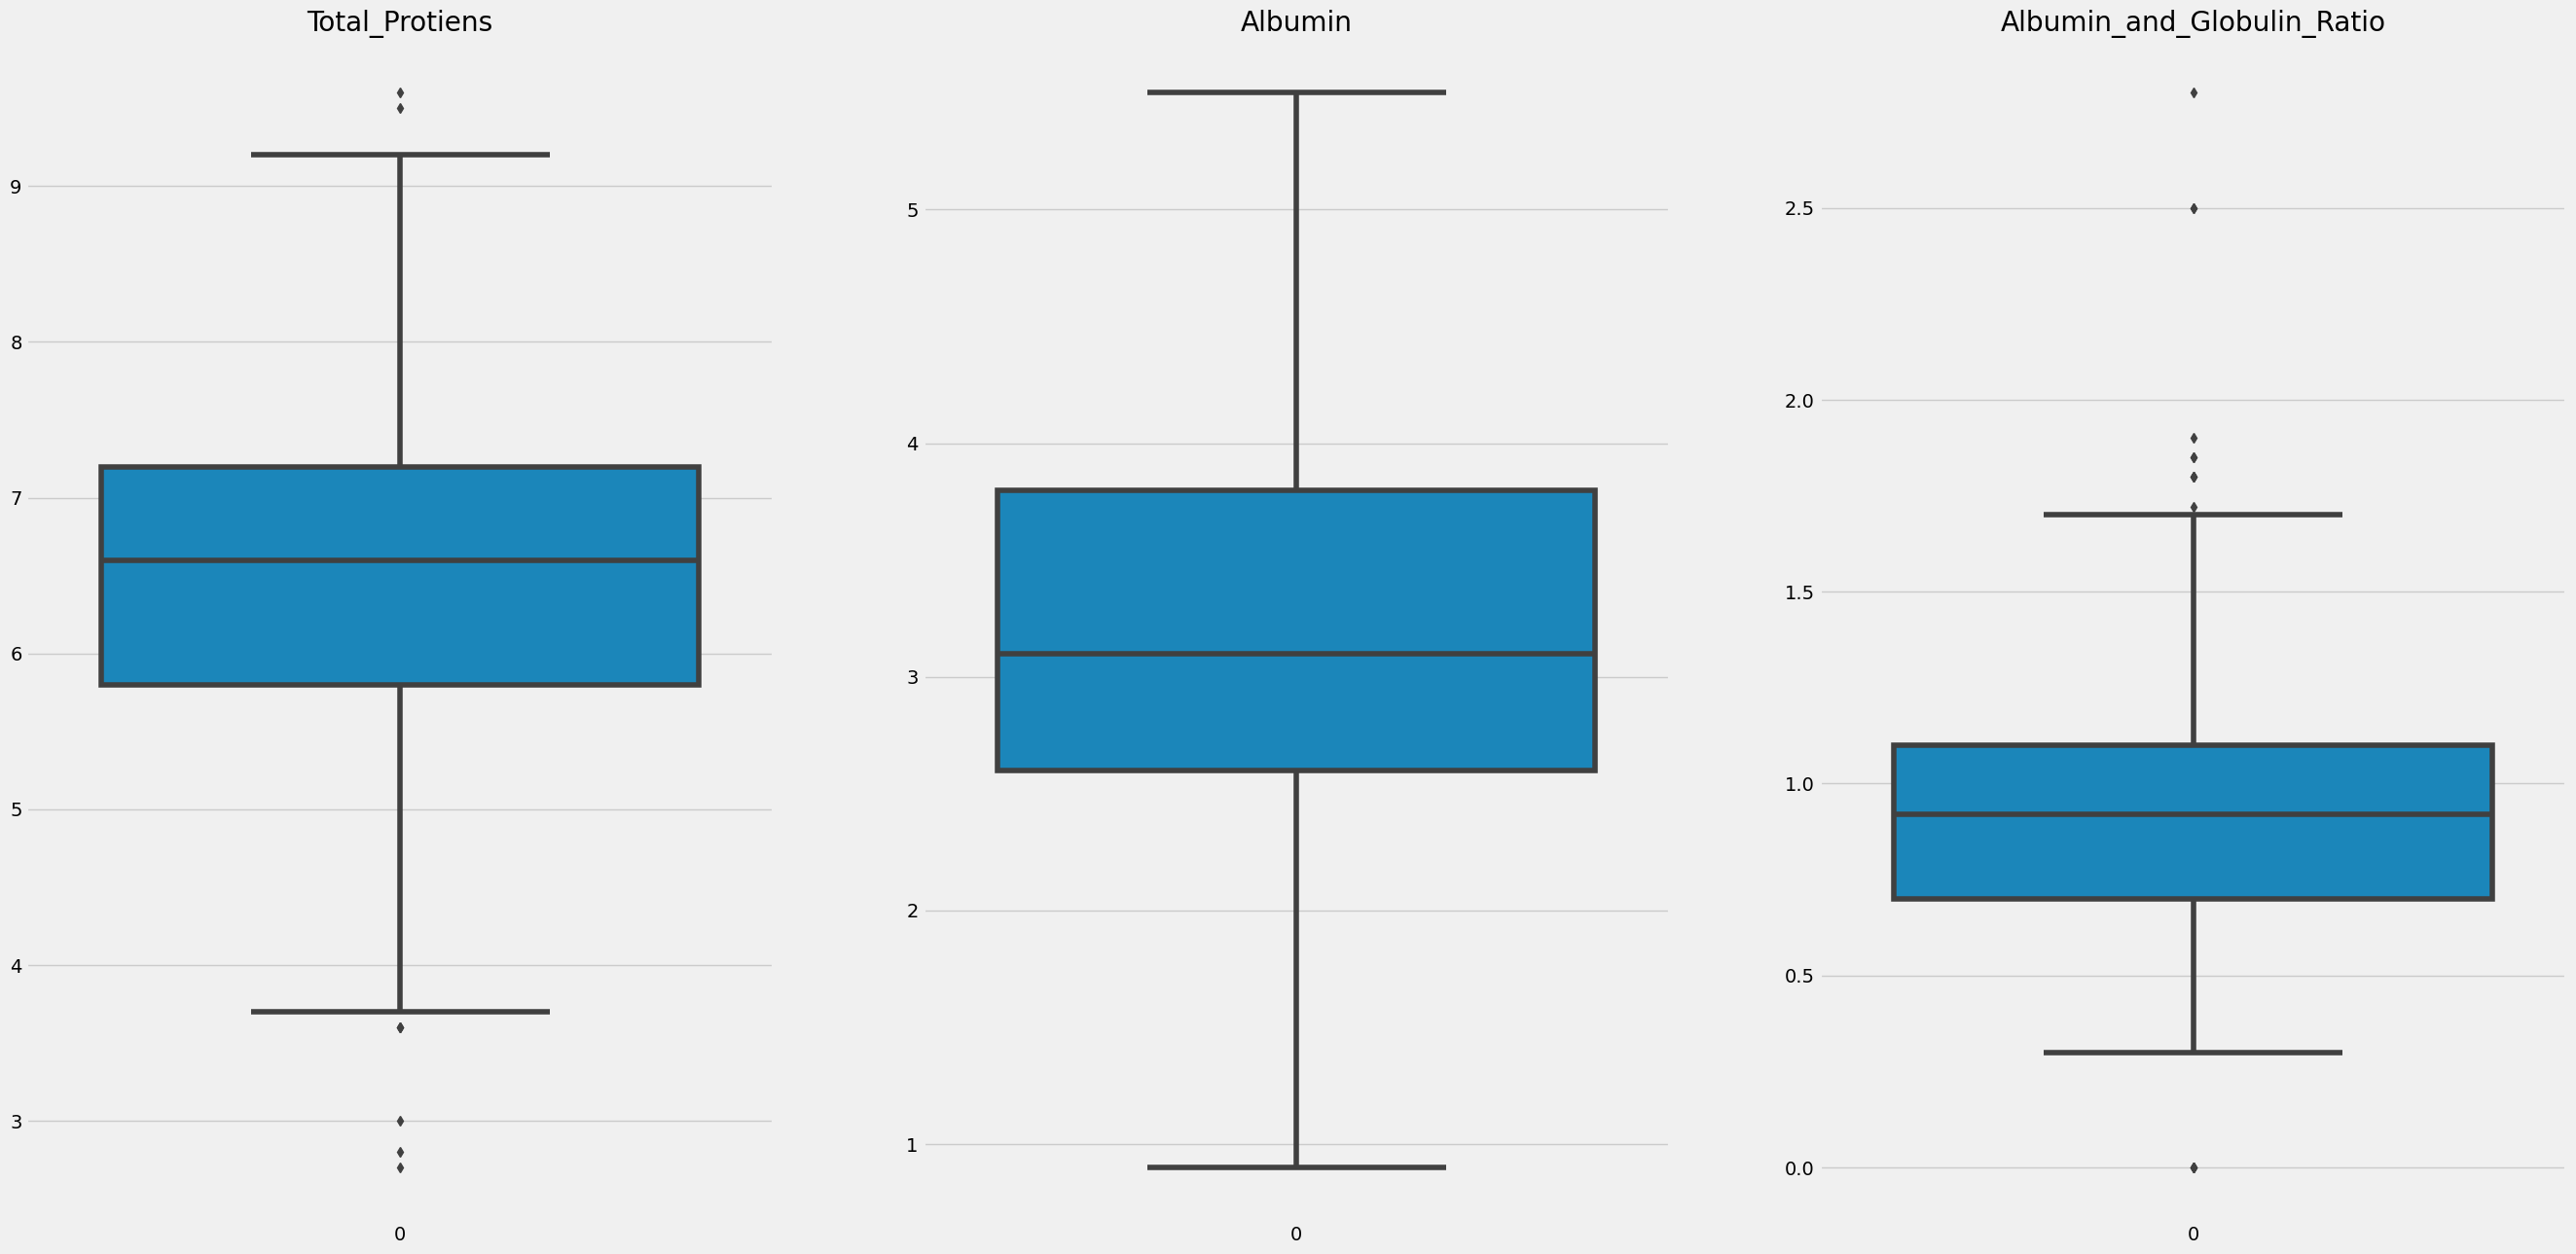

In [17]:
# Finding the outliers for Total_Protiens,Albumin and Albumin_and_Globulin_Ratio
plt.figure(figsize=(30,15))
plt.subplot(131)
sns.boxplot(df['Total_Protiens'])
plt.title('Total_Protiens')
plt.subplot(132)
sns.boxplot(df['Albumin'])
plt.title('Albumin')
plt.subplot(133)
sns.boxplot(df['Albumin_and_Globulin_Ratio'])
plt.title('Albumin_and_Globulin_Ratio')

In [18]:
# Finding the count of outliers for Total_Bilirubin

# IQR =q3-q1........,ub = q3+(1.5*IQR) , lb = q1-(1.5*IQR)

q1=np.quantile(df['Total_Bilirubin'],0.25)
q3=np.quantile(df['Total_Bilirubin'],0.75)

print('Q1 = {}'.format(q1))
print('Q3 = {}'.format(q3))

IQR = q3-q1

print('IQR value is {}'.format(IQR))

upperBound = q3+(1.5*IQR)
lowerBound = q1-(1.5*IQR)


print('The upperbound value is {} & the lower bound value is {}'.format(upperBound,lowerBound))

print('Skwed data :',len(df[df['Total_Bilirubin']>upperBound]))

Q1 = 0.8
Q3 = 2.6
IQR value is 1.8
The upperbound value is 5.300000000000001 & the lower bound value is -1.9000000000000001
Skwed data : 84


In [19]:
# Finding the count of outliers for Direct_Bilirubin

# IQR =q3-q1........,ub = q3+(1.5*IQR) , lb = q1-(1.5*IQR)

q1=np.quantile(df['Direct_Bilirubin'],0.25)
q3=np.quantile(df['Direct_Bilirubin'],0.75)

print('Q1 = {}'.format(q1))
print('Q3 = {}'.format(q3))

IQR = q3-q1

print('IQR value is {}'.format(IQR))

upperBound = q3+(1.5*IQR)
lowerBound = q1-(1.5*IQR)

print('The upperbound value is {} & the lower bound value is {}'.format(upperBound,lowerBound))

print('Skwed data :',len(df[df['Direct_Bilirubin']>upperBound]))

Q1 = 0.2
Q3 = 1.3
IQR value is 1.1
The upperbound value is 2.95 & the lower bound value is -1.4500000000000002
Skwed data : 81


In [20]:
# Finding the count of outliers for Alkaline_Phosphotase

# IQR =q3-q1........,ub = q3+(1.5*IQR) , lb = q1-(1.5*IQR)

q1=np.quantile(df['Alkaline_Phosphotase'],0.25)
q3=np.quantile(df['Alkaline_Phosphotase'],0.75)

print('Q1 = {}'.format(q1))
print('Q3 = {}'.format(q3))

IQR = q3-q1

print('IQR value is {}'.format(IQR))

upperBound = q3+(1.5*IQR)
lowerBound = q1-(1.5*IQR)

print('The upperbound value is {} & the lower bound value is {}'.format(upperBound,lowerBound))

print('Skwed data :',len(df[df['Alkaline_Phosphotase']>upperBound]))

Q1 = 175.5
Q3 = 298.0
IQR value is 122.5
The upperbound value is 481.75 & the lower bound value is -8.25
Skwed data : 69


In [21]:
# Finding the count of outliers for Alamine_Aminotransferase

# IQR =q3-q1........,ub = q3+(1.5*IQR) , lb = q1-(1.5*IQR)

q1=np.quantile(df['Alamine_Aminotransferase'],0.25)
q3=np.quantile(df['Alamine_Aminotransferase'],0.75)

print('Q1 = {}'.format(q1))
print('Q3 = {}'.format(q3))

IQR = q3-q1

print('IQR value is {}'.format(IQR))

upperBound = q3+(1.5*IQR)
lowerBound = q1-(1.5*IQR)

print('The upperbound value is {} & the lower bound value is {}'.format(upperBound,lowerBound))

print('Skwed data :',len(df[df['Alamine_Aminotransferase']>upperBound]))

Q1 = 23.0
Q3 = 60.5
IQR value is 37.5
The upperbound value is 116.75 & the lower bound value is -33.25
Skwed data : 73


In [22]:
# Finding the count of outliers for Aspartate_Aminotransferase

# IQR =q3-q1........,ub = q3+(1.5*IQR) , lb = q1-(1.5*IQR)

q1=np.quantile(df['Aspartate_Aminotransferase'],0.25)
q3=np.quantile(df['Aspartate_Aminotransferase'],0.75)

print('Q1 = {}'.format(q1))
print('Q3 = {}'.format(q3))

IQR = q3-q1

print('IQR value is {}'.format(IQR))

upperBound = q3+(1.5*IQR)
lowerBound = q1-(1.5*IQR)

print('The upperbound value is {} & the lower bound value is {}'.format(upperBound,lowerBound))

print('Skwed data :',len(df[df['Aspartate_Aminotransferase']>upperBound]))

Q1 = 25.0
Q3 = 87.0
IQR value is 62.0
The upperbound value is 180.0 & the lower bound value is -68.0
Skwed data : 66


In [23]:
# Finding the count of outliers for Total_Protiens

# IQR =q3-q1........,ub = q3+(1.5*IQR) , lb = q1-(1.5*IQR)

q1=np.quantile(df['Total_Protiens'],0.25)
q3=np.quantile(df['Total_Protiens'],0.75)

print('Q1 = {}'.format(q1))
print('Q3 = {}'.format(q3))

IQR = q3-q1

print('IQR value is {}'.format(IQR))

upperBound = q3+(1.5*IQR)
lowerBound = q1-(1.5*IQR)

print('The upperbound value is {} & the lower bound value is {}'.format(upperBound,lowerBound))

print('Skwed data :',len(df[df['Total_Protiens']>upperBound]))

Q1 = 5.8
Q3 = 7.2
IQR value is 1.4000000000000004
The upperbound value is 9.3 & the lower bound value is 3.6999999999999993
Skwed data : 2


In [24]:
# Finding the count of outliers for Albumin_and_Globulin_Ratio

# IQR =q3-q1........,ub = q3+(1.5*IQR) , lb = q1-(1.5*IQR)


q1=np.quantile(df['Albumin_and_Globulin_Ratio'],0.25)
q3=np.quantile(df['Albumin_and_Globulin_Ratio'],0.75)


print('Q1 = {}'.format(q1))
print('Q3 = {}'.format(q3))

IQR = q3-q1

print('IQR value is {}'.format(IQR))

upperBound = q3+(1.5*IQR)
lowerBound = q1-(1.5*IQR)

print('The upperbound value is {} & the lower bound value is {}'.format(upperBound,lowerBound))

print('Skwed data :',len(df[df['Albumin_and_Globulin_Ratio']>upperBound]))

Q1 = 0.7
Q3 = 1.1
IQR value is 0.40000000000000013
The upperbound value is 1.7000000000000002 & the lower bound value is 0.09999999999999976
Skwed data : 10


In [25]:
#function for handling outlier
def transform(variable):
  plt.figure(figsize=(14,6))
  plt.subplot(131)
  sns.distplot(variable)
  plt.subplot(132)
  stats.probplot(variable,plot=plt)


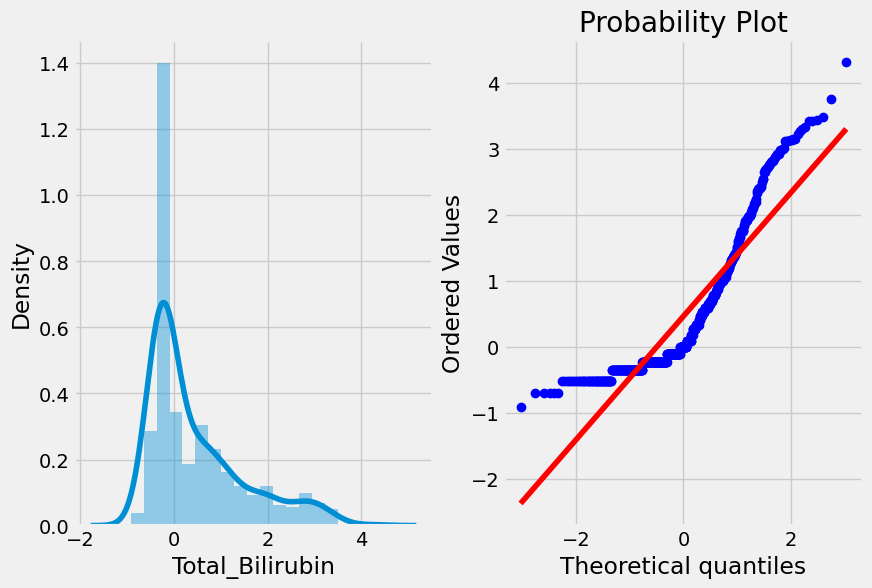

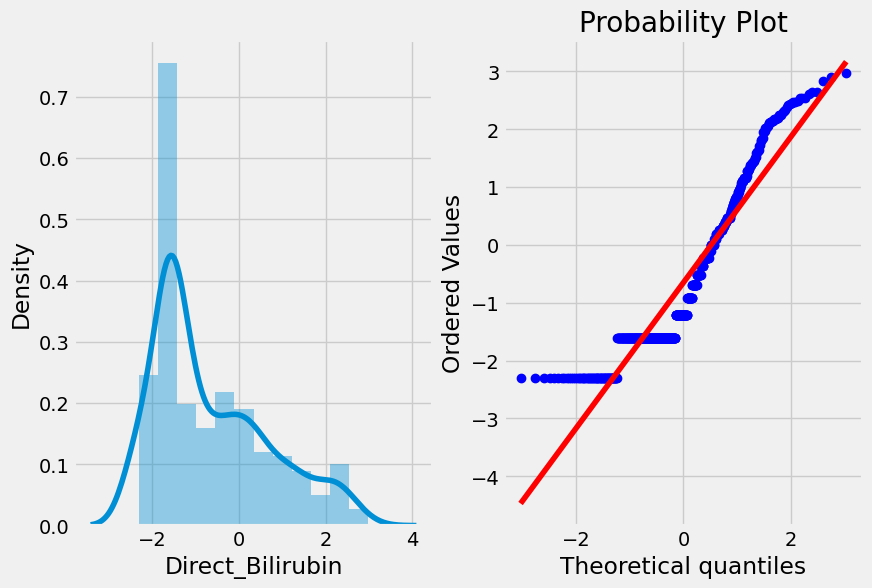

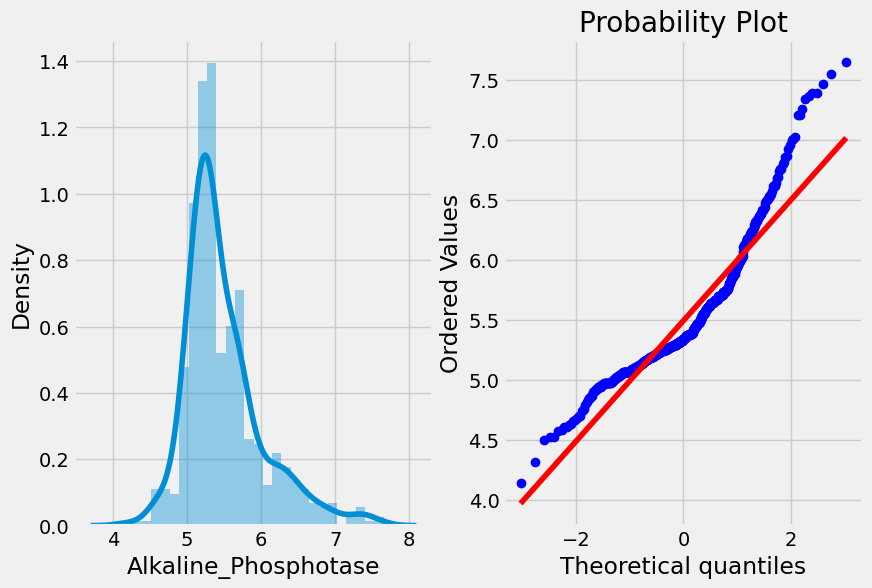

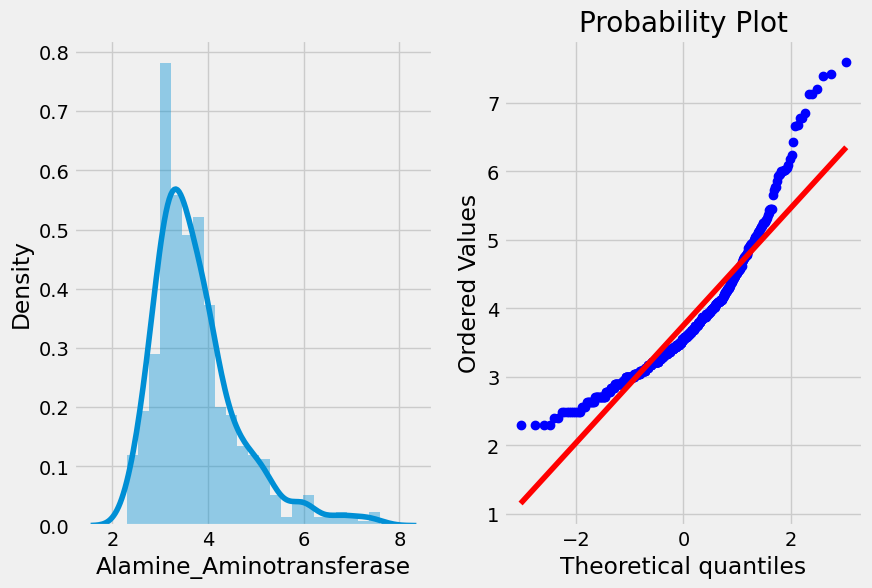

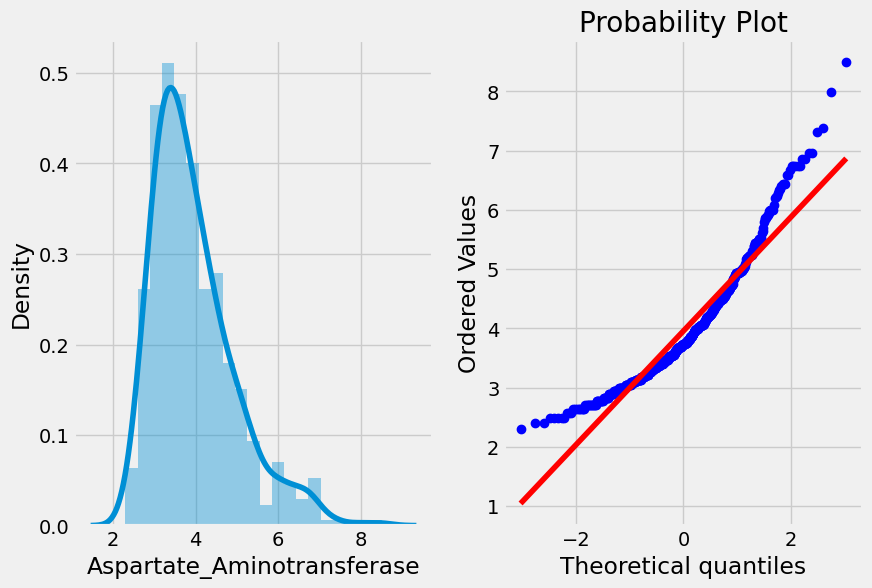

In [26]:
transform(np.log(df['Total_Bilirubin']))
transform(np.log(df['Direct_Bilirubin']))
transform(np.log(df['Alkaline_Phosphotase']))
transform(np.log(df['Alamine_Aminotransferase']))
transform(np.log(df['Aspartate_Aminotransferase']))



In [27]:
#scale
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame(scale(x),columns=x.columns)

In [28]:
X_scaled.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.123797
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.612077
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.154315
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.181378
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.649672


In [29]:
#Splitting data into train and test
x=df.iloc[:,:-1]
y=df.Dataset

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [31]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [32]:
y_train.value_counts()

1    329
2    137
Name: Dataset, dtype: int64

In [33]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [34]:
y_train_smote.value_counts()

1    329
2    329
Name: Dataset, dtype: int64

In [35]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model1=RandomForestClassifier()
model1.fit(x_train_smote,y_train_smote)
y_predict=model1.predict(x_test)
rfc1=accuracy_score(y_test,y_predict)
rfc1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.80      0.78      0.79        87
           2       0.41      0.43      0.42        30

    accuracy                           0.69       117
   macro avg       0.60      0.61      0.61       117
weighted avg       0.70      0.69      0.70       117



In [36]:
#Decision tree model
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(x_train_smote,y_train_smote)
y_predict=model4.predict(x_test)
dct1=accuracy_score(y_test,y_predict)
dct1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.82      0.71      0.76        87
           2       0.39      0.53      0.45        30

    accuracy                           0.67       117
   macro avg       0.60      0.62      0.61       117
weighted avg       0.71      0.67      0.68       117



In [37]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(x_train_smote,y_train_smote)
y_predict=model2.predict(x_test)
knn1=(accuracy_score(y_test,y_predict))
knn1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))



              precision    recall  f1-score   support

           1       0.88      0.48      0.62        87
           2       0.35      0.80      0.48        30

    accuracy                           0.56       117
   macro avg       0.61      0.64      0.55       117
weighted avg       0.74      0.56      0.59       117



In [38]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
model5.fit(x_train_smote,y_train_smote)
y_predict=model5.predict(x_test)
logi1=accuracy_score(y_test,y_predict)
logi1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.93      0.57      0.71        87
           2       0.41      0.87      0.56        30

    accuracy                           0.65       117
   macro avg       0.67      0.72      0.63       117
weighted avg       0.79      0.65      0.67       117



In [39]:
#Ann
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [40]:
#Initializing the ANN
classifier=Sequential()


In [41]:
#Adding the input layer and the first hidden layer
classifier.add(Dense(units=100,activation='relu',input_dim=10))

In [42]:
#Adding the second hidden layer
classifier.add(Dense(units=50,activation='relu'))

In [43]:
#Adding the Output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [44]:
#Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
#Fitting the ANN to the Training set
model_history=classifier.fit(x_train,y_train,batch_size=100,validation_split=0.2,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 85ms/step - loss: 0.7676 - accuracy: 0.2312 - val_loss: 0.5765 - val_accuracy: 0.4574
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4950 - accuracy: 0.5511 - val_loss: 0.3210 - val_accuracy: 0.6809
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2687 - accuracy: 0.6989 - val_loss: 0.1161 - val_accuracy: 0.7234
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0779 - accuracy: 0.7016 - val_loss: -0.0616 - val_accuracy: 0.7234
Epoch 5/100
4/4 [==============================] - 0s 25ms/step - loss: -0.1023 - accuracy: 0.7016 - val_loss: -0.2271 - val_accuracy: 0.7234
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: -0.2592 - accuracy: 0.7016 - val_loss: -0.3912 - val_accuracy: 0.7234
Epoch 7/100
4/4 [==============================] - 0s 25ms/step - loss: -0.4210 - accuracy: 0.7016 - val_loss: -0.5531 - val_accuracy: 0.7234
Epoch 8/100
4

In [46]:
#Training the model

In [47]:
model4.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

array([1])

In [48]:
model1.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

array([1])

In [49]:
model2.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

array([1])

In [50]:
model5.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

array([1])

In [51]:
classifier.save("liver.h5")

In [52]:
y_pred=classifier.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [53]:
y_pred

array([[1.        ],
       [1.        ],
       [0.9999792 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.9999792 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.   

In [54]:
y_pred=(y_pred>0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [55]:
def predict_exit(sample_value):
  #Convert list to numpy array
  sample_value=np.array(sample_value)
  #Reshape because sample_value contains only 1 record
  sample_value=sample_value.reshape(1,-1)
  #Feature scaling
  sample_value=scale(sample_value)
  return classifier.predict(sample_value)

In [56]:
#sample predict
sample_value=[[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]]
if predict_exit(sample_value)>0.5:
  print('prediction:Liver Patient')
else:
   print('Healthy')

1/1 [==============================] - 0s 61ms/step
prediction:Liver Patient


In [57]:
#Testing model with multiple evaluation metrics

In [58]:
#compare the model
acc_smote=[['KNN classifier',knn1],['RandomForestClassifier',rfc1],['DecisionTreeClassifier',dct1],['LogisticRegression',logi1]]
Liverpatient_pred=pd.DataFrame(acc_smote,columns=['classification models','accuracy_score'])
Liverpatient_pred

,classification models,accuracy_score
0,KNN classifier,0.564103
1,RandomForestClassifier,0.692308
2,DecisionTreeClassifier,0.666667
3,LogisticRegression,0.649573


<Axes: title={'center': 'Classification models & accuracy scores after SMOTE'}, xlabel='classification models', ylabel='accuracy_score'>

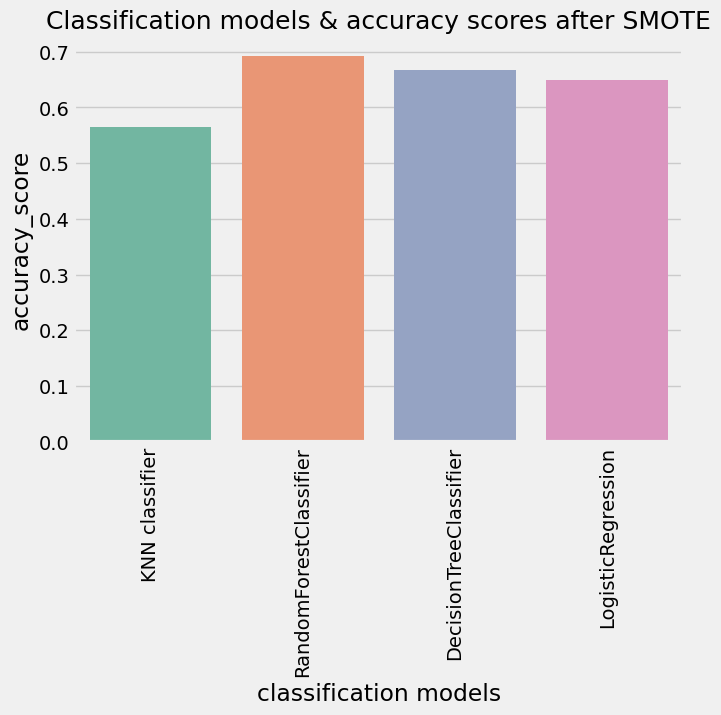

In [59]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores after SMOTE',fontsize=18)
sns.barplot(x="classification models",y="accuracy_score",data=Liverpatient_pred,palette="Set2")

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [61]:
model.feature_importances_

array([0.11762406, 0.02299774, 0.11367756, 0.10768291, 0.11802294,
       0.11743734, 0.11516469, 0.09529287, 0.0984649 , 0.09363498])

In [62]:
dd=pd.DataFrame(model.feature_importances_,index=x.columns).sort_values(0,ascending=False)
dd

,0
Alkaline_Phosphotase,0.118023
Age,0.117624
Alamine_Aminotransferase,0.117437
Aspartate_Aminotransferase,0.115165
Total_Bilirubin,0.113678
Direct_Bilirubin,0.107683
Albumin,0.098465
Total_Protiens,0.095293
Albumin_and_Globulin_Ratio,0.093635
Gender,0.022998


Text(0.5, 1.0, 'Feature Importance')

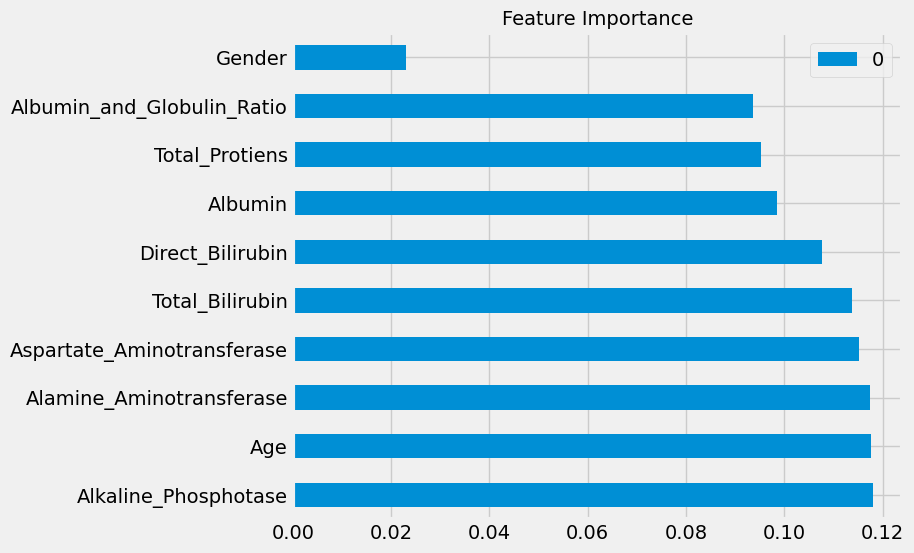

In [63]:
dd.plot(kind='barh',figsize=(7,6))
plt.title("Feature Importance",fontsize=14)

In [64]:
import pickle

In [65]:
pickle.dump(model,open('Liver_analysis.pkl','wb'))